In [120]:
import re
import json
import pprint
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
#HELPER FUNCTIONS
def get_addr_data(json_dataset):
    """
    # info on available address fields ( and how are they used )
    # export addr data to pandas-dataset [ element-id, addr-field, addr-field-val ]
    #   run analysis of the dataset
    """
    data_header = ['node_id', 'node_type', 'tag', 'val']
    raw_data = []
    for json_node in json_dataset:
        if 'address' in json_node:
            for tag in json_node['address']:
                raw_data.append([
                    json_node['id'],
                    json_node['type'],
                    tag,
                    json_node['address'][tag]
                ])
        else:
            raw_data.append([
                json_node['id'],
                json_node['type'],
                None,
                None
            ])
    return pd.DataFrame(raw_data, columns=data_header)




In [107]:
#CONST DEFINITIONS
DATA_SOURCE='..\sample-100-redwood-city-ca.osm.json'

#LOADING DATA
parsed_json_data = []
for line in open(DATA_SOURCE, 'r'):
    parsed_json_data.append(json.loads(line))
    
data_df = get_addr_data(parsed_json_data)

data_addr_df = data_df[pd.notnull(data_df['tag'])]

In [98]:
data_addr_df.head()

,node_id,node_type,tag,val
98,1337779743,node,housenumber,66
143,1438723123,node,housenumber,355
179,1599245638,node,housenumber,70
181,1641208803,node,housenumber,805
184,1733719626,node,city,Redwood City


In [108]:
print "Number of nodes: %d" % len(data_addr_df['node_id'].unique())
print "Listing the unique address tags:"
print data_addr_df['tag'].unique()
print data_addr_df['tag'].describe()

Number of nodes: 442
Listing the unique address tags:
[u'state' u'city' u'street' u'housenumber' u'postcode' u'unit' u'country'
 u'county']
count             988
unique              8
top       housenumber
freq              383
Name: tag, dtype: object


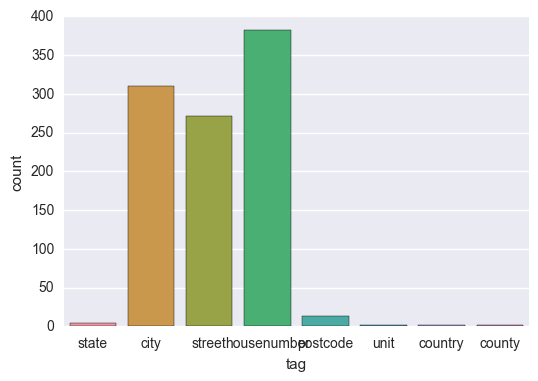

In [109]:
#Investigating the number of tags associated with addresses
sns.countplot ( data_addr_df['tag'] )

In [127]:
UNIQUE_CHECK_EXCLUDE = ['street', 'housenumber', 'unit']
tags_to_check =  data_addr_df['tag'].unique()
for tag in tags_to_check:
    if tag in UNIQUE_CHECK_EXCLUDE:
        continue
    else:
        print "[%s] UNIQUE VALUE CHECK" % tag
        print data_addr_df[data_addr_df['tag'] == tag]['val'].unique()

[state] UNIQUE VALUE CHECK
[u'CA']
[city] UNIQUE VALUE CHECK
[u'Redwood City' u'Palo Alto' u'San Mateo' u'Menlo Park']
[postcode] UNIQUE VALUE CHECK
[u'94063' u'94061' u'94403' u'94025']
[country] UNIQUE VALUE CHECK
[u'US']
[county] UNIQUE VALUE CHECK
[u'San Mateo' u'Santa Clara']


In [128]:
#Investigate street names
#  compiling re outside of lambda for better performance
street_type_re = re.compile('.*\s(?P<street_type>[^\s]+)\s*$')

def get_street_type(df_row, street_type_re):
    street_full_name = df_row['val']
    street_type_match = street_type_re.match(street_full_name)
    if street_type_match:
        return street_type_match.group('street_type')
    else:
        return street_full_name
    
street_data_df = data_addr_df[data_addr_df['tag'] == 'street'].copy()
street_data_df['st_type'] = street_data_df.apply( lambda row : get_street_type(row, street_type_re), axis=1)


street_data_df.head()
street_data_df['st_type'].unique()

array([u'Street', u'Real', u'Avenue', u'Road', u'Broadway', u'Way',
       u'Court', u'Place', u'Drive', u'Plz', u'Lane', u'Alameda',
       u'Oakridge', u'Boulevard'], dtype=object)